In [1]:
import numpy as np
import pywt
import matplotlib.pyplot as plt
from imageio import imread
from imageio import imsave
from scipy import linalg as la
import cv2 

In [2]:
def Fusion_PCA(image1, image2):
    # Converting Image data to numpy Array to be able to do necessary calculation
    a = np.array(image1)
    b = np.array(image2)
    # getting Image dimensions
    temp1 = a.shape
    temp2 = b.shape
    # Starting PCA algorithm
    # creating matrix with both Images
    vector1 = np.reshape(a, temp1[0] * temp1[1], order='F')
    vector2 = np.reshape(b, temp2[0] * temp2[1], order='F')
    #  creating covariance matrix
    c = np.cov(vector1, vector2)
    # getting Eigenvalue and Eigenvector of this matrix
    d, v = la.eig(c)
    sum1 = np.sum(v, axis=0)
    # Calculating PCA
    if d[0] >= d[1]:
        pca = np.divide(v[:, 0], sum1[0])
    else:
        pca = np.divide(v[:, 1], sum1[1])
    # Creating fused image
    result = (pca[0] * image1) + (pca[1] * image2)
    return result

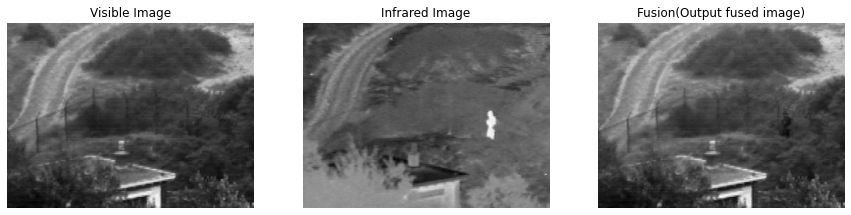

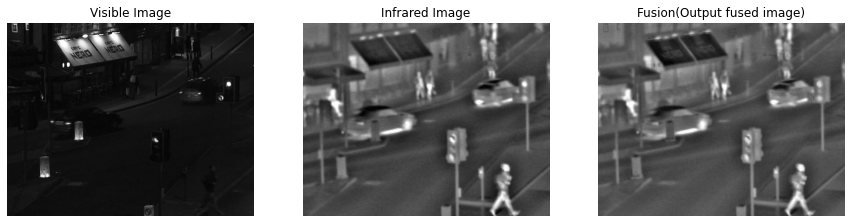

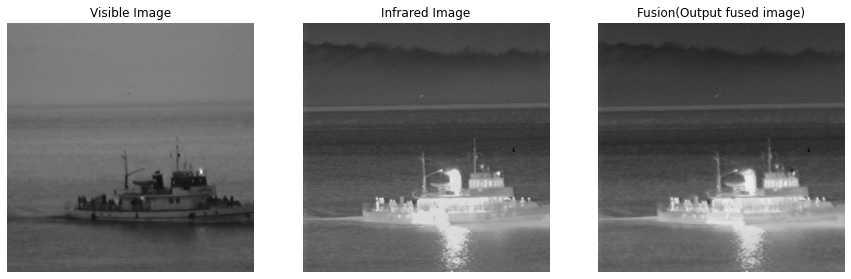

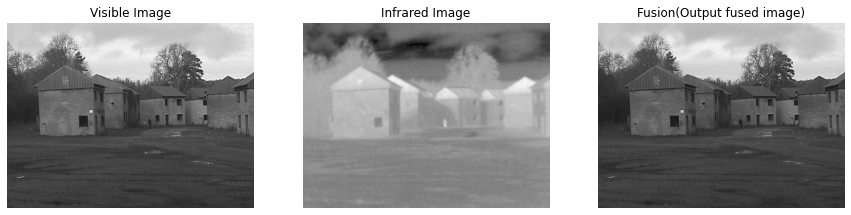

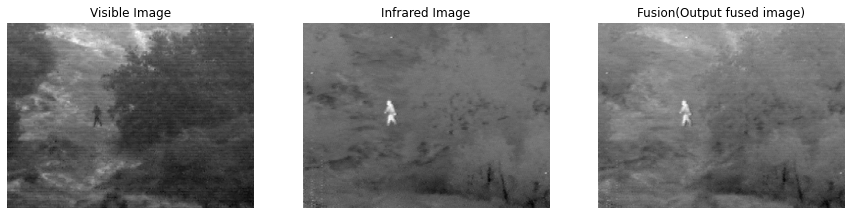

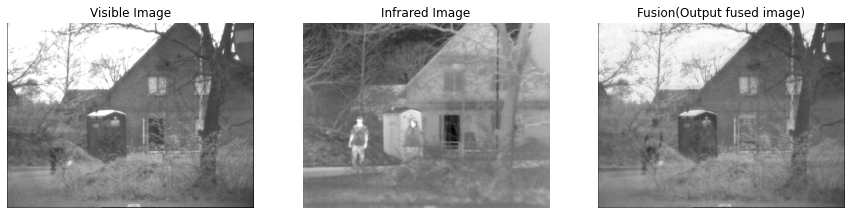

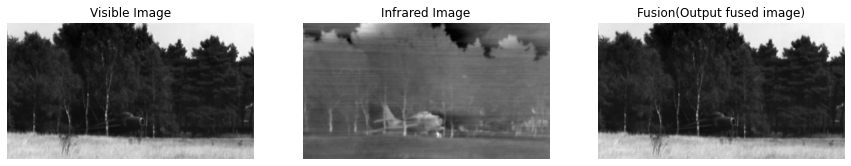

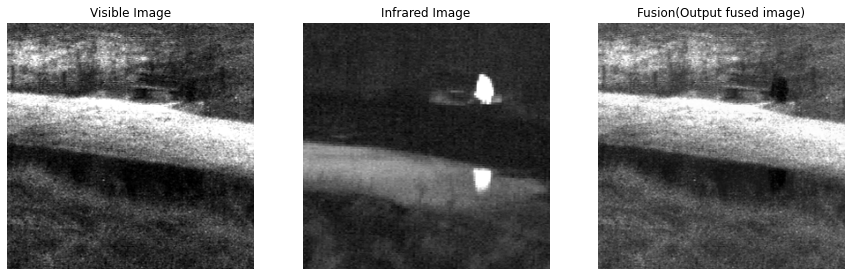

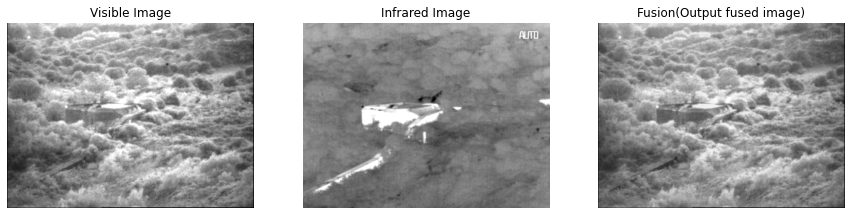

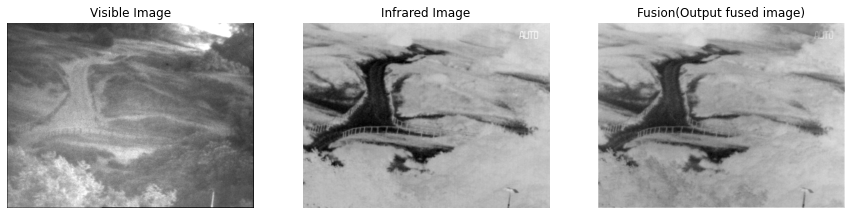

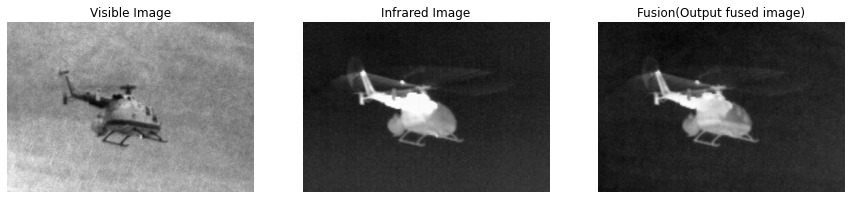

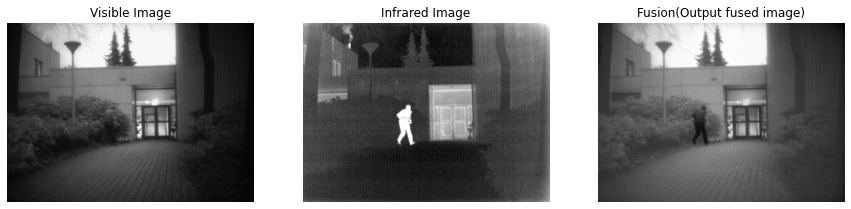

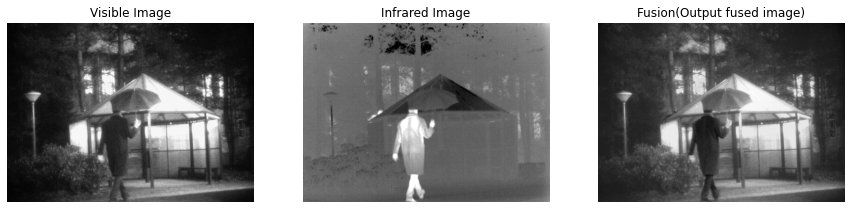

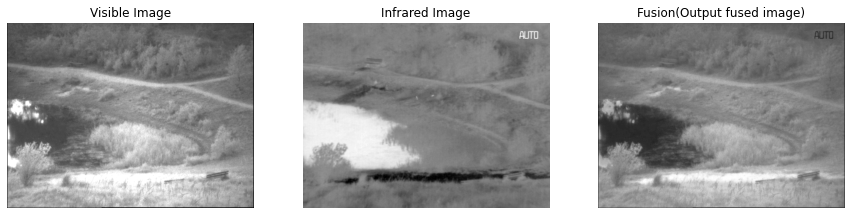

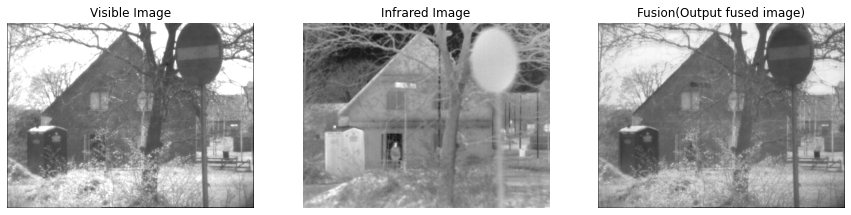

In [3]:
for id_x in range(1, 16, 1):

    gray_img = imread('IV_images/VIS%d.png' % id_x)
    ir_img = imread('IV_images/IR%d.png' % id_x)

    pic = Fusion_PCA(gray_img, ir_img)

    pict = pic * 255
    pict = pict.astype(np.uint8)
    
    plt.figure(figsize=(15, 10))
    plt.subplot(1, 3, 1)
    plt.imshow(gray_img, 'gray')
    plt.axis('off')
    plt.title('Visible Image')

    plt.subplot(1, 3, 2)
    plt.imshow(ir_img, 'gray')
    plt.axis('off')
    plt.title('Infrared Image')

    plt.subplot(1, 3, 3)
    plt.imshow(pic, 'gray')
    plt.axis('off')
    plt.title('Fusion(Output fused image)')
    plt.show()

In [4]:
# Performs Image fusion using Discrete wavelet transform (DWT) with Daubechies filter
# input: two Images dataset (matrix) to be fused
# output: one Fused Image dataset (matrix)


def Fusion_DWT_db2(image1, image2):
    # decomposing each image using Discrete wavelet transform(DWT) with Daubechies filter (db2)
    coefficients_1 = pywt.wavedec2(image1, 'db2', level=2)
    coefficients_2 = pywt.wavedec2(image2, 'db2', level=2)
    # creating variables to be used
    coefficients_h = list(coefficients_1)
    # fusing the decomposed image data
    coefficients_h[0] = (coefficients_1[0] + coefficients_2[0]) * 0.5
    # creating variables to be used
    temp1 = list(coefficients_1[1])
    temp2 = list(coefficients_2[1])
    temp3 = list(coefficients_h[1])
    # fusing the decomposed image data
    temp3[0] = (temp1[0] + temp2[0]) * 0.5
    temp3[1] = (temp1[1] + temp2[1]) * 0.5
    temp3[2] = (temp1[2] + temp2[2]) * 0.5
    coefficients_h[1] = tuple(temp3)
    # Creating fused image by reconstructing the fused decomposed image
    result = pywt.waverec2(coefficients_h, 'db2')
    return result

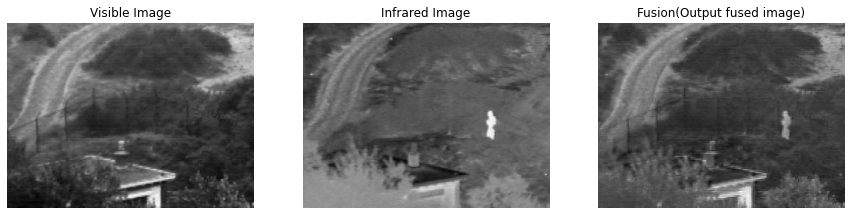

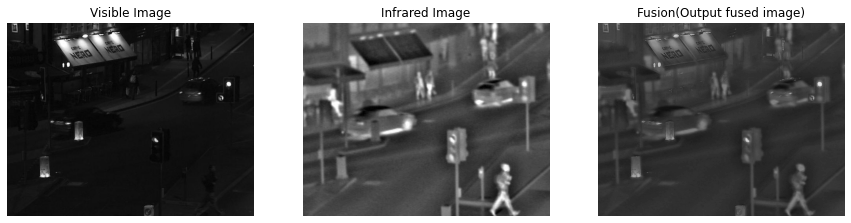

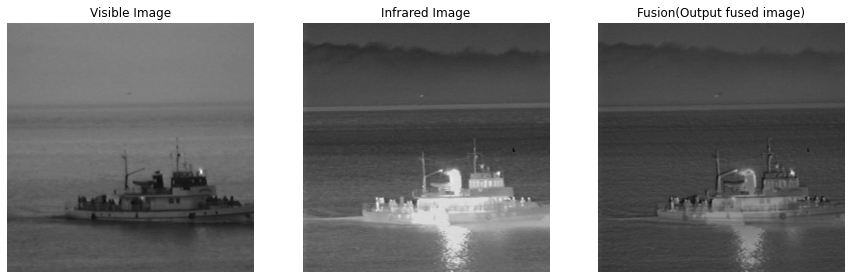

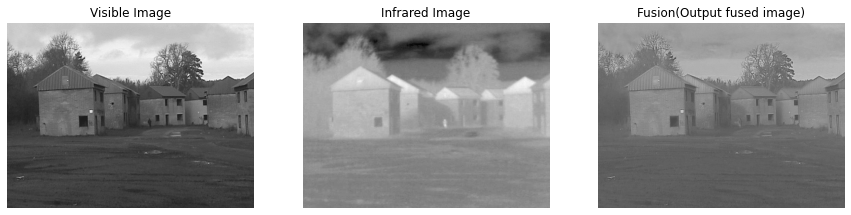

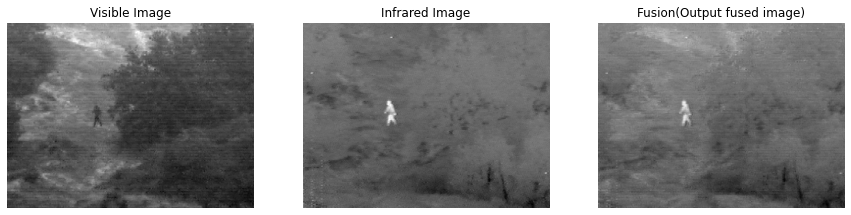

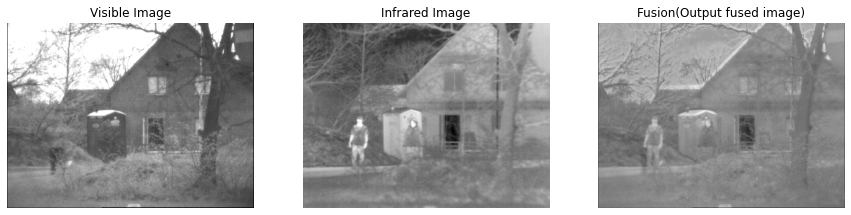

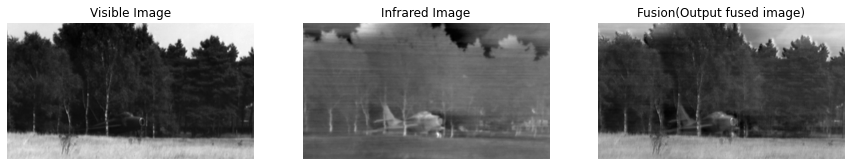

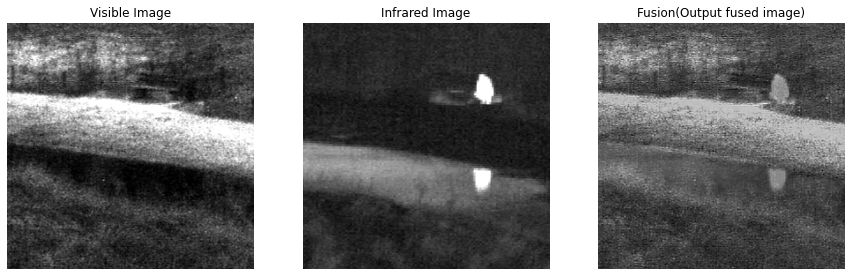

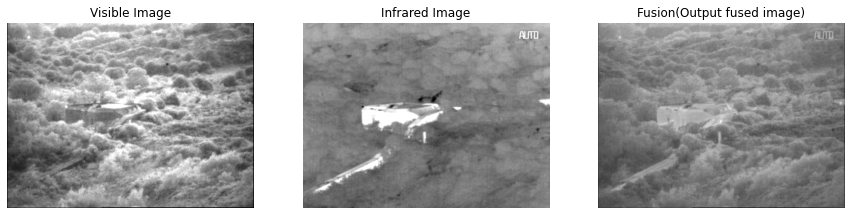

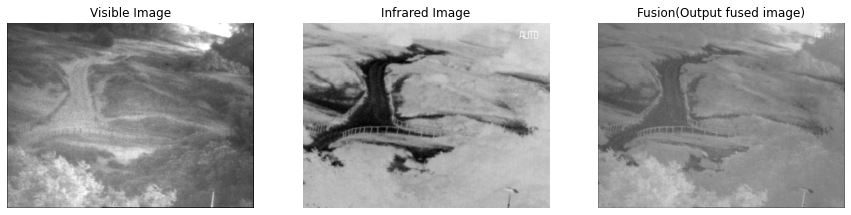

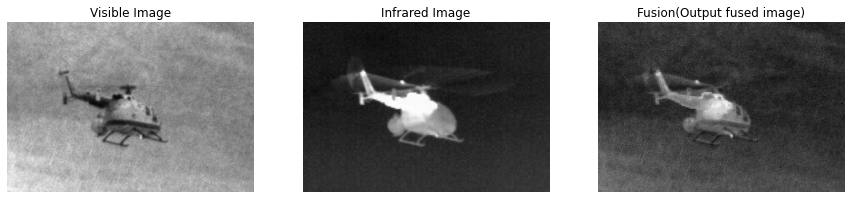

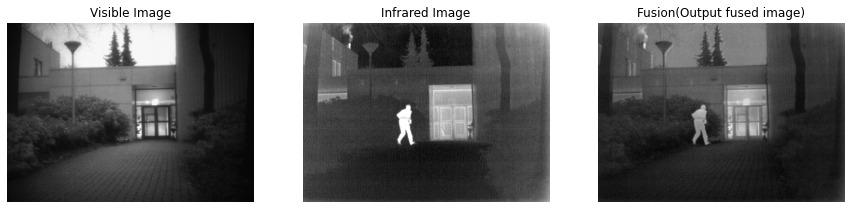

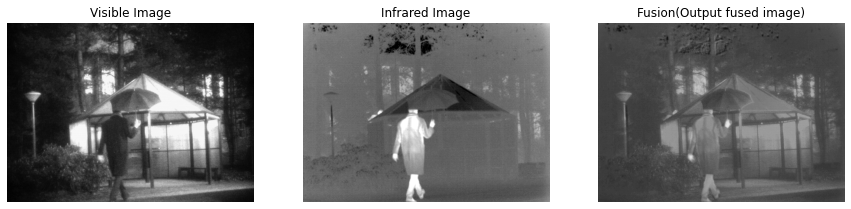

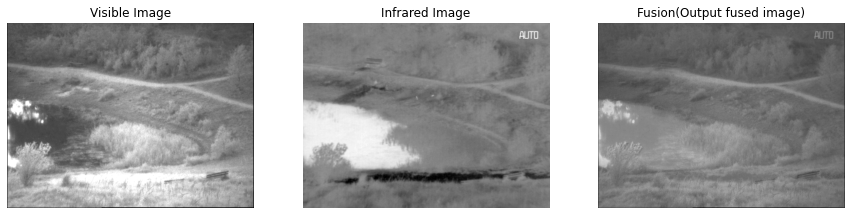

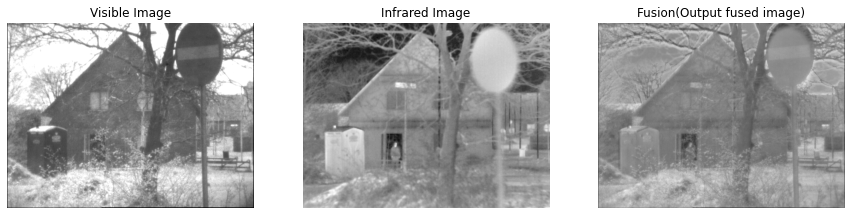

In [5]:
for id_x in range(1, 16, 1):

    gray_img = imread('IV_images/VIS%d.png' % id_x)
    ir_img = imread('IV_images/IR%d.png' % id_x)

    pic = Fusion_DWT_db2(gray_img, ir_img)

    pict = pic * 255
    pict = pict.astype(np.uint8)
    
    plt.figure(figsize=(15, 10))
    plt.subplot(1, 3, 1)
    plt.imshow(gray_img, 'gray')
    plt.axis('off')
    plt.title('Visible Image')

    plt.subplot(1, 3, 2)
    plt.imshow(ir_img, 'gray')
    plt.axis('off')
    plt.title('Infrared Image')

    plt.subplot(1, 3, 3)
    plt.imshow(pic, 'gray')
    plt.axis('off')
    plt.title('Fusion(Output fused image)')
    plt.show()